# 필요한 모듈 임포트

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 그래프 설정 초기화
plt.rcdefaults()
sns.set_theme(font='Malgun Gothic')

In [3]:
jeju_df = pd.read_csv('data/jeju_card.csv')

In [4]:
jeju_df.head()

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600


In [5]:
jeju_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19573 entries, 0 to 19572
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     19573 non-null  object
 1   시군구명    19573 non-null  object
 2   지역구분    19573 non-null  object
 3   업종명     19573 non-null  object
 4   이용자 구분  19573 non-null  object
 5   연령대     19573 non-null  object
 6   성별      19573 non-null  object
 7   연월      19573 non-null  object
 8   이용자수    19573 non-null  int64 
 9   이용횟수    19573 non-null  int64 
 10  이용금액    19573 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.6+ MB


In [6]:
jeju_df.isnull().sum()

시도명       0
시군구명      0
지역구분      0
업종명       0
이용자 구분    0
연령대       0
성별        0
연월        0
이용자수      0
이용횟수      0
이용금액      0
dtype: int64

In [7]:
jeju_df.describe(include='all')

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
count,19573,19573,19573,19573,19573,19573,19573,19573,19573.000000,19573.000000,1.957300e+04
unique,1,2,2,8,2,7,2,28,NaN,NaN,NaN
top,제주도,제주시,도심,식음료,내국인관광객,50대,남,2017-10,NaN,NaN,NaN
freq,19573,9852,9858,2688,9807,3376,9795,738,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2987.681347,5980.462525,2.100849e+08
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5331.172895,13623.951410,3.921408e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.000000,371.000000,1.765947e+07
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,972.000000,1376.000000,7.142090e+07
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3169.000000,5710.000000,2.169743e+08


# EDA 및 데이터 전처리
- 연월 데이터 연도와 월 분리해서 컬럼으로 빼준다. dtype을 int로 바꾼다.
- 이용금액 단위를 만원 단위로 바꾼다.
- 연령대에 20 미만이라는 값과 20대미만은 같은 값이므로 통일시킨다.
- 2016년도는 데이터에 적기 때문에 제외한다.

## 데이터 전처리

In [8]:
# columns = ['시군구명', '지역구분', '업종명', '이용자 구분', '연령대', '성별', '연월']
object_columns = jeju_df.columns[jeju_df.dtypes == 'object']
for col in object_columns:
    print(f"{col} : ", jeju_df[col].unique())

시도명 :  ['제주도']
시군구명 :  ['제주시' '서귀포시']
지역구분 :  ['읍면' '도심']
업종명 :  ['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타']
이용자 구분 :  ['제주도민' '내국인관광객']
연령대 :  ['60대이상' '50대' '40대' '30대' '20대미만' '20대' '20 미만']
성별 :  ['여' '남']
연월 :  ['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09']


In [4]:
# 연월 데이터에서 연도와 월을 따로 분리해서 연도와 월 컬럼 추가, dtype을 int로 변경
jeju_df['연도'] = jeju_df['연월'].str.split("-").str[0]
jeju_df['월'] = jeju_df['연월'].str.split("-").str[1]
# jeju_df = jeju_df.drop('연월', axis=1)

jeju_df['연도'] = jeju_df['연도'].astype(int)
jeju_df['월'] = jeju_df['월'].astype(int)

# 이용금액 단위를 만원 단위로 바꾼다.
jeju_df['이용금액(만원)'] = jeju_df['이용금액'] / 10000

# 연령대에 20 미만이라는 값과 20대미만은 같은 값이므로 통일시킨다.
jeju_df.loc[jeju_df['연령대'] == '20 미만', '연령대'] = '20대미만'

jeju_df.head(3)

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도,월,이용금액(만원)
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100,2018,12,424.01
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000,2018,12,2741.40
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000,2018,12,684.80


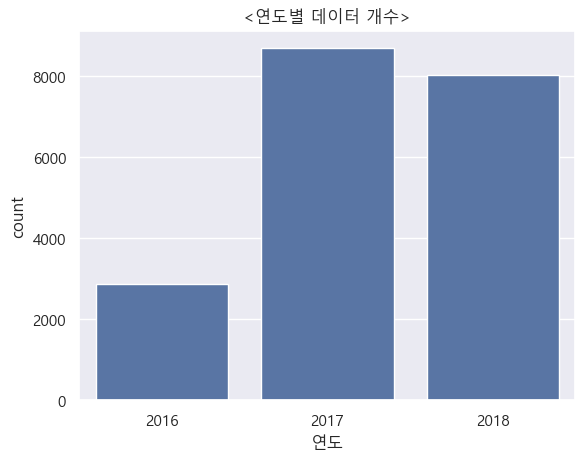

In [10]:
sns.countplot(data=jeju_df, x='연도')
plt.title('<연도별 데이터 개수>')
plt.show()

In [5]:
# 2016년 데이터 개수 적어서 제외하고 분석한다.
jeju_df = jeju_df[(jeju_df['연도'] == 2017) | (jeju_df['연도'] == 2018)]

## 범주형 데이터 분포 알아보기

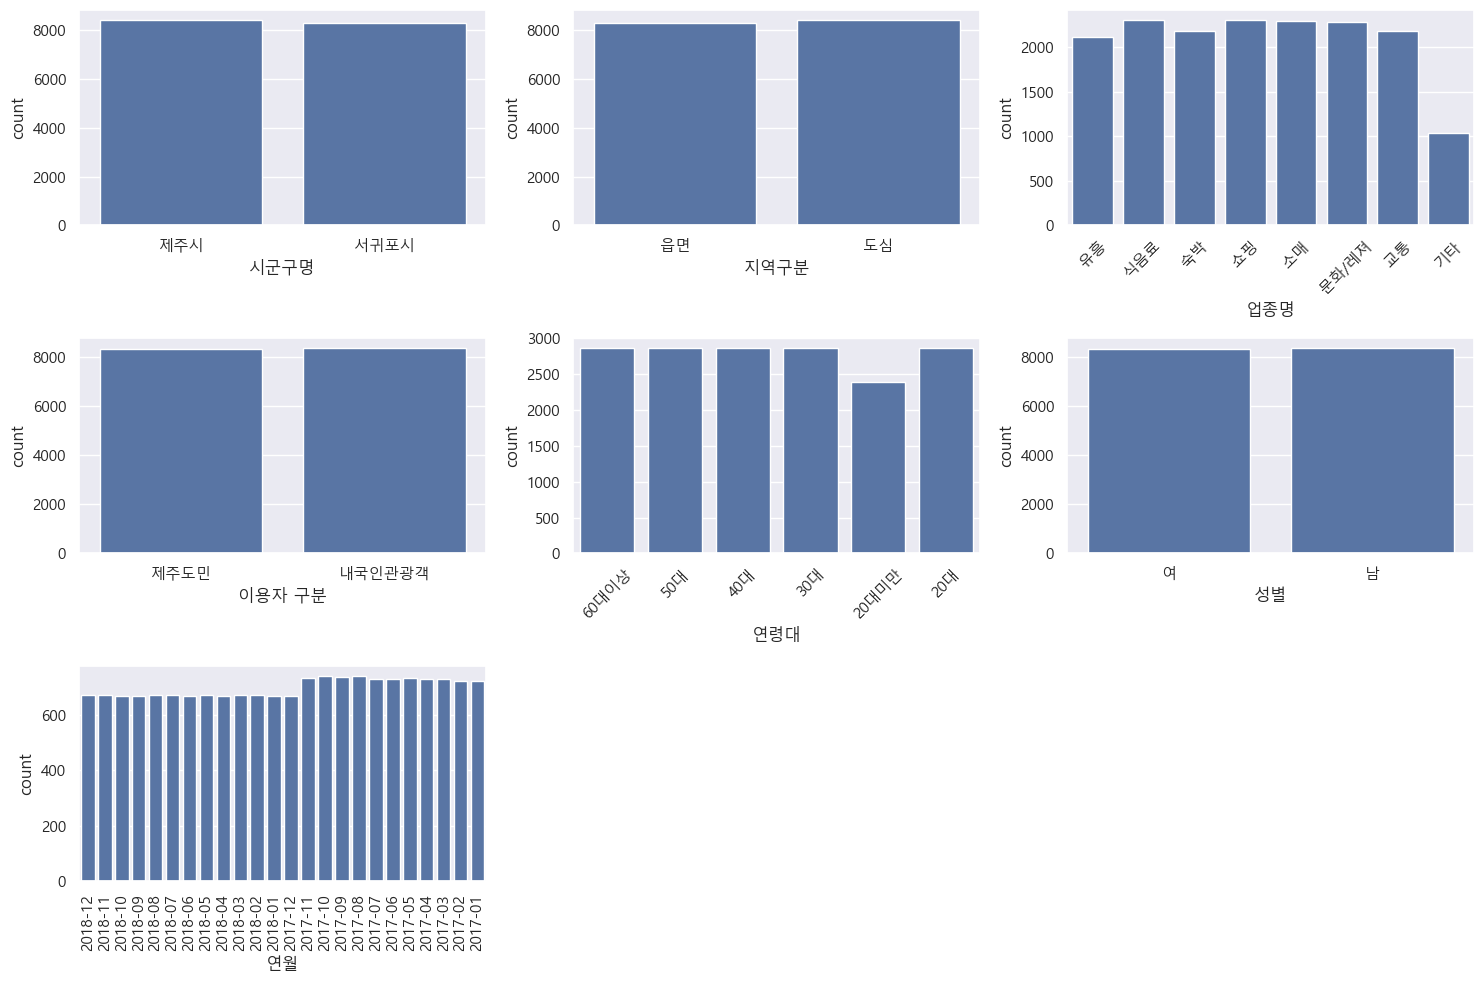

In [12]:
categorical_data = list(jeju_df.select_dtypes(include='object').columns)[1:] # 시도명은 제주도 하나 밖에 없으므로 제외
row_count = len(categorical_data) // 3

plt.figure(figsize=(15,10))

for i, col in enumerate(categorical_data, 1):
    plt.subplot(row_count+1, 3, i)
    sns.countplot(data=jeju_df, x=col)
    if col in ['업종명', '연령대']:
        plt.xticks(rotation=45)
    if col == '연월':
        plt.xticks(rotation=90)
        
plt.tight_layout()
plt.show()

## 수치형 데이터 분포 알아보기

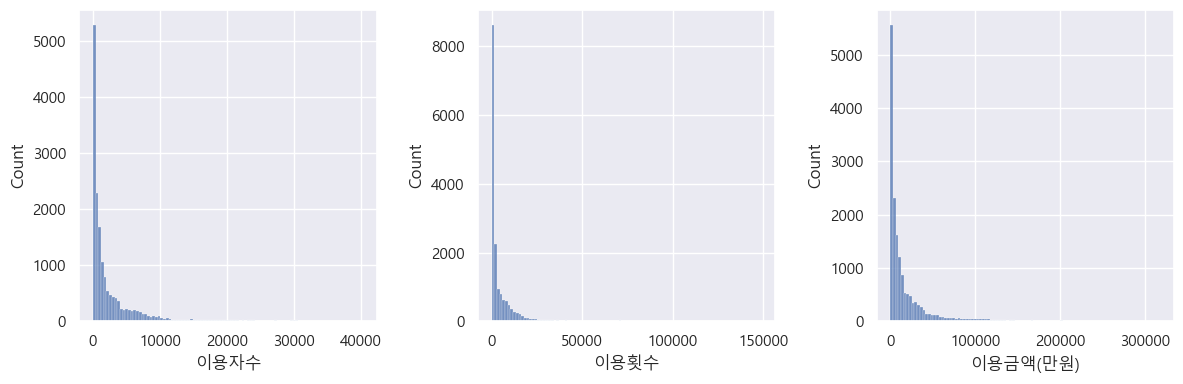

In [13]:
numerical_columns = ['이용자수', '이용횟수', '이용금액(만원)']

plt.figure(figsize=(12, 4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=jeju_df, x=col, bins=100)

plt.tight_layout()
plt.show()

# Data Analysis

## 연월별 카드 이용금액

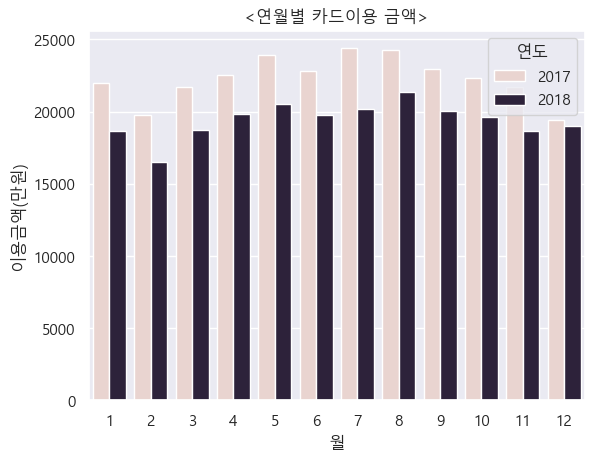

In [14]:
sns.barplot(data=jeju_df, x='월', y='이용금액(만원)', errorbar=None, hue='연도')
plt.title('<연월별 카드이용 금액>')
plt.show()

## 연월별 이용자수, 연월별/성별 이용자수

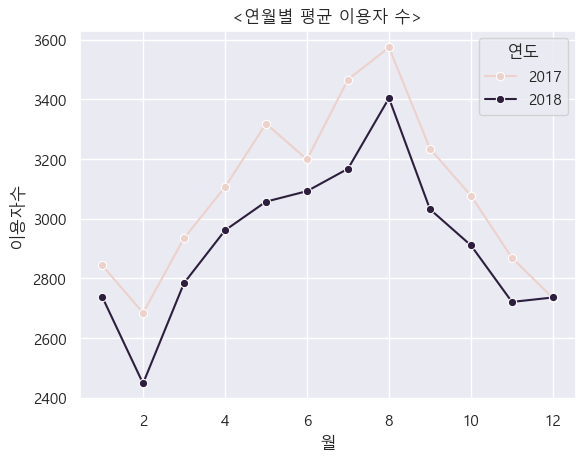

In [15]:
# 연월별 이용자수 추이, 이용자수가 단순히 2017년도가 더 많았다.
sns.lineplot(data=jeju_df, x='월', y='이용자수', errorbar=None, hue='연도', marker='o')
plt.title('<연월별 평균 이용자 수>')
plt.show()

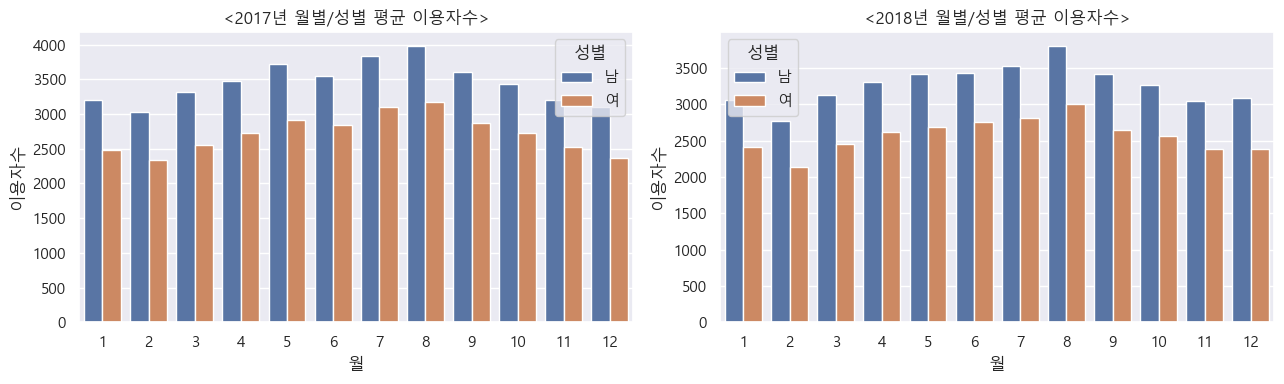

In [16]:
jeju_2017 = jeju_df[jeju_df['연도'] == 2017].copy()
jeju_2018 = jeju_df[jeju_df['연도'] == 2018].copy()
jeju_2018.sort_values('성별', inplace=True)

plt.figure(figsize=(13, 4))
datas = [jeju_2017, jeju_2018]
for i, data in enumerate(datas, 1):
    plt.subplot(1, 2, i)
    plt.title(f'<{2016+i}년 월별/성별 평균 이용자수>')
    sns.barplot(data=data, x='월', y='이용자수', errorbar=None, hue='성별')
    
plt.tight_layout()
plt.show()

## 연도별 연령대별 카드 이용금액

In [17]:
# 연령대 category 데이터 타입으로 변경
jeju_df['연령대'] = pd.Categorical(jeju_df['연령대'],
                                      categories=['20대미만', '20대', '30대', '40대', '50대', '60대이상'],
                                      ordered=True)

In [18]:
group_ym_age = jeju_df.groupby(['연도', '연령대'])[['이용자수', '이용횟수', '이용금액']].sum().reset_index()
group_ym_age

C:\Users\user\AppData\Local\Temp\ipykernel_19032\3257385005.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_ym_age = jeju_df.groupby(['연도', '연령대'])[['이용자수', '이용횟수', '이용금액']].sum().reset_index()


,연도,연령대,이용자수,이용횟수,이용금액
0,2017,20대미만,203078,429896,4996657612
1,2017,20대,4800559,9304114,208175160124
2,2017,30대,7080363,13499213,437721213544
3,2017,40대,6965143,14414930,561248406540
4,2017,50대,5158034,10314259,468286978356
5,2017,60대이상,2640430,5069478,260136246561
6,2018,20대미만,216056,475236,5027234286
7,2018,20대,4262563,8714136,175770246392
8,2018,30대,5759053,11372820,320955678476
9,2018,40대,6081331,12925032,442123304148


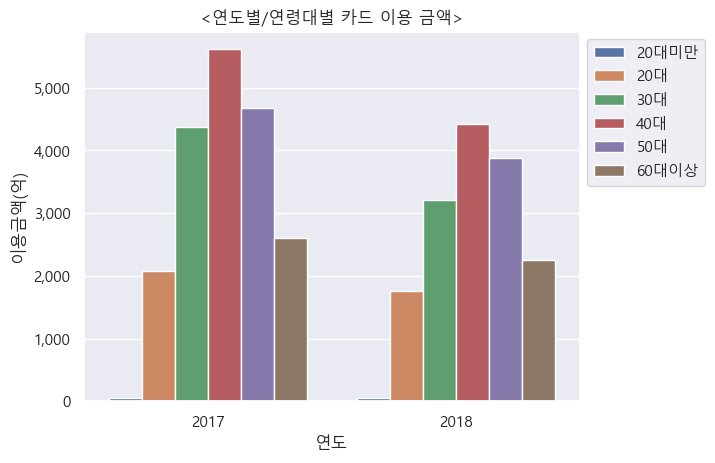

In [20]:
# 연령대별 연월 카드 이용금액 살펴보기
sns.barplot(data=group_ym_age, x='연도', y='이용금액', hue='연령대')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')
plt.title('<연도별/연령대별 카드 이용 금액>')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## 연도별 이용자별 카드 이용금액

In [21]:
groupby_ym_user = jeju_df.groupby(['연도', '이용자 구분'])[['이용자수', '이용횟수', '이용금액']].sum().reset_index()
groupby_ym_user

,연도,이용자 구분,이용자수,이용횟수,이용금액
0,2017,내국인관광객,12761026,20113119,754434825907
1,2017,제주도민,14086581,32918771,1186129836830
2,2018,내국인관광객,11179654,17830178,633357078211
3,2018,제주도민,12241253,30011987,922893881613


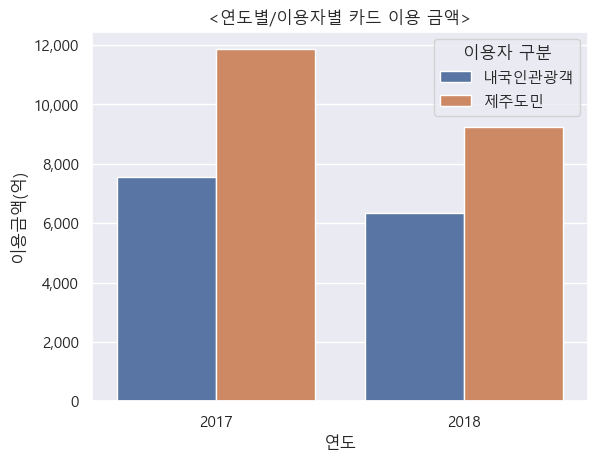

In [22]:
sns.barplot(data=groupby_ym_user, x='연도', y='이용금액', hue='이용자 구분')
plt.title('<연도별/이용자별 카드 이용 금액>')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')
plt.show()

## 연도별 업종별 카드 이용 금액

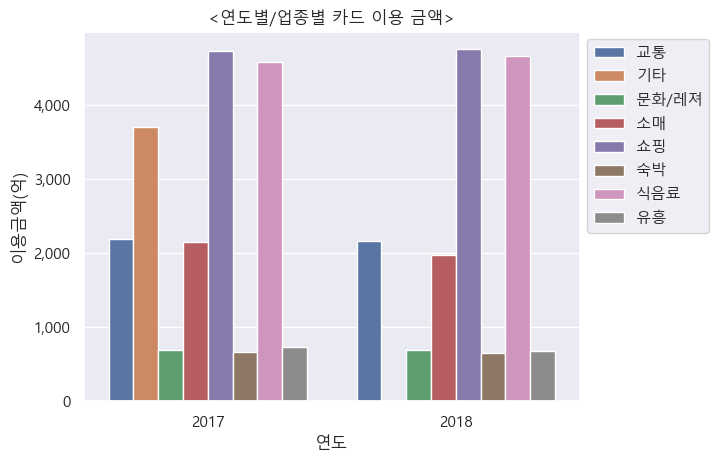

In [6]:
groupby_ym_market = jeju_df.groupby(['연도', '업종명'])[['이용자수', '이용횟수', '이용금액']].sum().reset_index()

sns.barplot(data=groupby_ym_market, x='연도', y='이용금액', hue='업종명')
plt.title('<연도별/업종별 카드 이용 금액>')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [7]:
jeju_df[jeju_df['업종명'] == '기타']['연월'].unique()

array(['2017-11', '2017-10', '2017-09', '2017-08', '2017-07', '2017-06',
       '2017-05', '2017-04', '2017-03', '2017-02', '2017-01'],
      dtype=object)

In [24]:
# 2018년 기타 항목은 제외한다. (2018년 데이터 누락)
jeju_df = jeju_df[jeju_df['업종명'] != '기타']

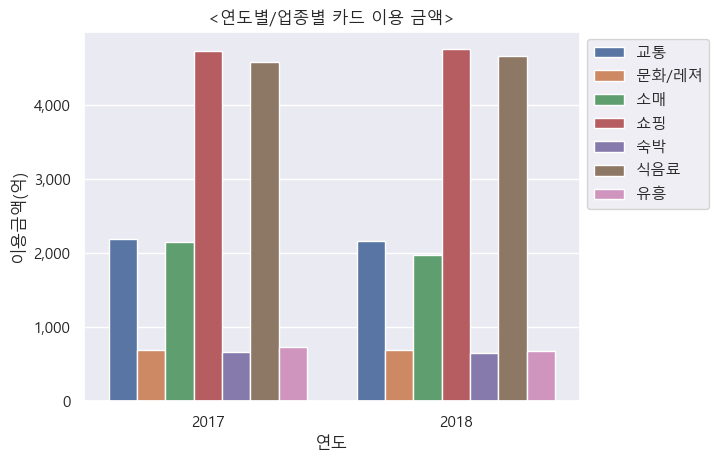

In [26]:
groupby_ym_market = jeju_df.groupby(['연도', '업종명'])[['이용자수', '이용횟수', '이용금액']].sum().reset_index()

sns.barplot(data=groupby_ym_market, x='연도', y='이용금액', hue='업종명')
plt.title('<연도별/업종별 카드 이용 금액>')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## 연도별 성별 카드 이용금액

In [27]:
groupby_ym_sex = jeju_df.groupby(['연도', '성별'])[['이용자수', '이용횟수', '이용금액']].sum().reset_index()
groupby_ym_sex

,연도,성별,이용자수,이용횟수,이용금액
0,2017,남,13178671,26974688,925049089266
1,2017,여,10331311,19875614,645713001410
2,2018,남,13134688,27650476,912962941700
3,2018,여,10286219,20191689,643288018124


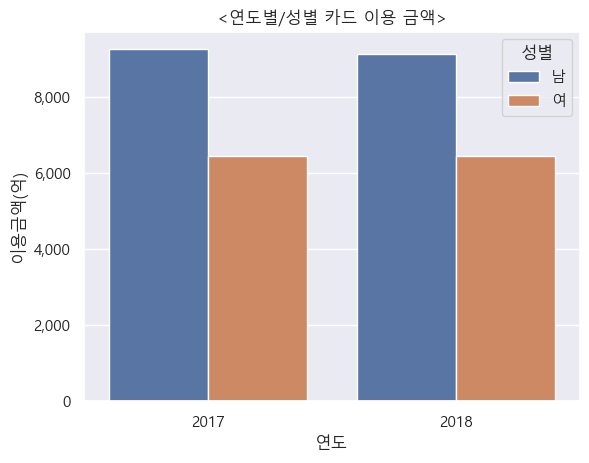

In [28]:
sns.barplot(data=groupby_ym_sex, x='연도', y='이용금액', hue='성별')
plt.title('<연도별/성별 카드 이용 금액>')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

plt.show()

## 연도별 이용자구분별 카드 이용 금액

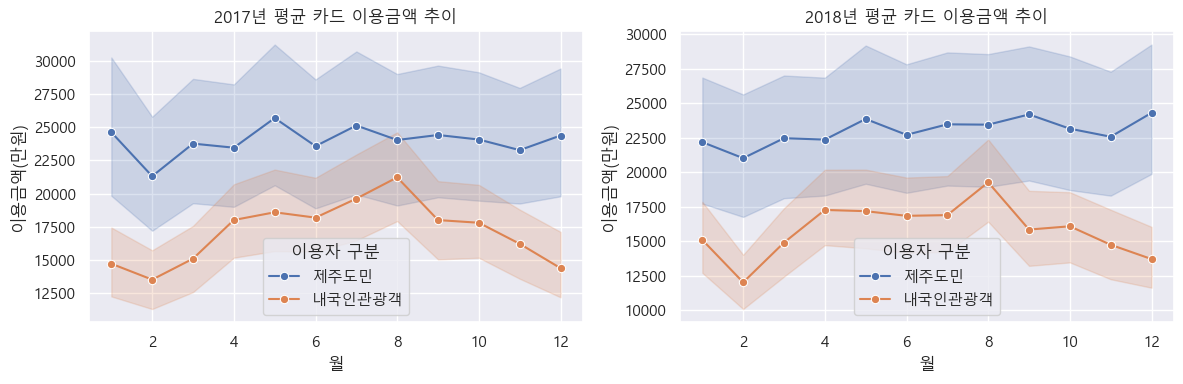

In [32]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('2017년 평균 카드 이용금액 추이')
sns.lineplot(data=jeju_df[jeju_df['연도']==2017], x='월', y='이용금액(만원)', marker='o', hue='이용자 구분')

plt.subplot(1, 2, 2)
plt.title('2018년 평균 카드 이용금액 추이')
sns.lineplot(data=jeju_df[jeju_df['연도']==2018], x='월', y='이용금액(만원)', marker='o', hue='이용자 구분')

plt.tight_layout()
plt.show()

## 연월별 연령대별 카드 이용 금액

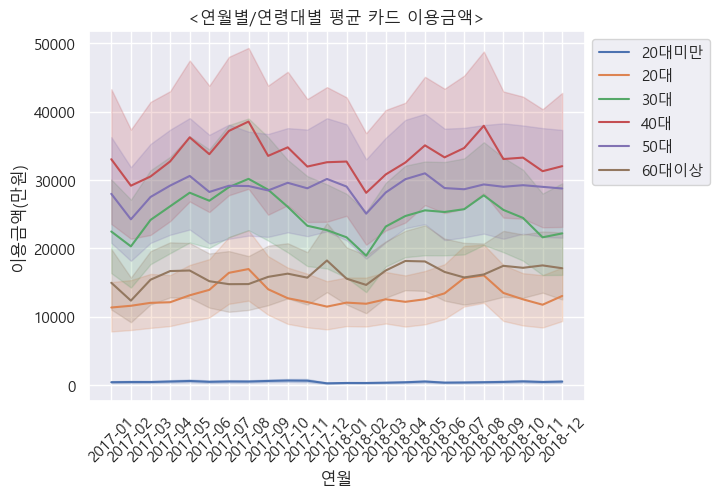

In [33]:
sns.lineplot(data=jeju_df.sort_values(['연월','연령대']), x='연월', y='이용금액(만원)', hue='연령대')
plt.title('<연월별/연령대별 평균 카드 이용금액>')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [34]:
groupby_age_ym = jeju_df.groupby(['연령대', '연월'])[['이용자수', '이용횟수', '이용금액']].sum().reset_index()
groupby_age_ym

C:\Users\user\AppData\Local\Temp\ipykernel_19032\3510373656.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age_ym = jeju_df.groupby(['연령대', '연월'])[['이용자수', '이용횟수', '이용금액']].sum().reset_index()


,연령대,연월,이용자수,이용횟수,이용금액
0,20대미만,2017-01,9309,20559,268333120
1,20대미만,2017-02,11215,23639,295809774
2,20대미만,2017-03,12917,28538,308058609
3,20대미만,2017-04,16743,34933,356994878
4,20대미만,2017-05,21319,39980,428037371
...,...,...,...,...,...
139,60대이상,2018-08,207769,431089,18101783583
140,60대이상,2018-09,208388,415272,19520727242
141,60대이상,2018-10,211715,412289,19193470928
142,60대이상,2018-11,207957,398300,19587261157


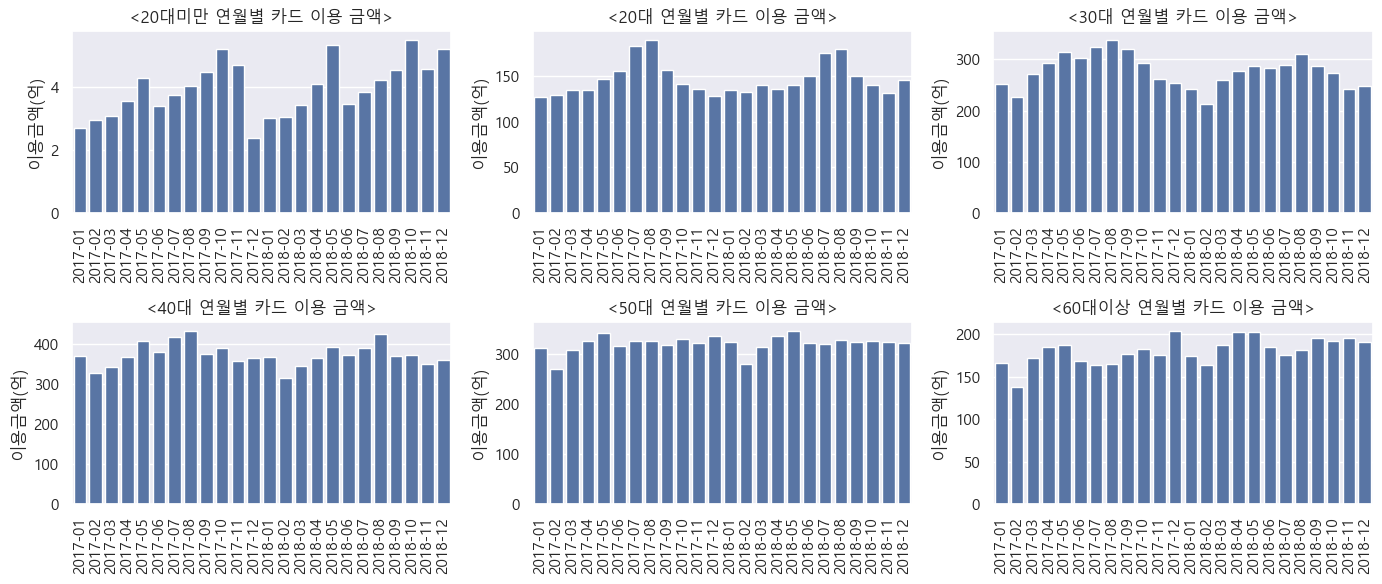

In [36]:
plt.figure(figsize=(14,6))

for i, age in enumerate(groupby_age_ym['연령대'].unique(), 1):
    plt.subplot(2, 3, i)
    data = groupby_age_ym[groupby_age_ym['연령대'] == age]
    sns.barplot(data=data, x='연월', y='이용금액')
    plt.title(f'<{age} 연월별 카드 이용 금액>')
    plt.xticks(rotation=90)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
    plt.ylabel('이용금액(억)')
    plt.xlabel("")

plt.tight_layout()
plt.show()

## 연령대별 카드 이용금액

In [37]:
groupby_age = jeju_df.groupby('연령대')[['이용자수', '이용횟수', '이용금액']].sum().reset_index()
groupby_age

C:\Users\user\AppData\Local\Temp\ipykernel_19032\3442057462.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age = jeju_df.groupby('연령대')[['이용자수', '이용횟수', '이용금액']].sum().reset_index()


,연령대,이용자수,이용횟수,이용금액
0,20대미만,401769,879205,9478228519
1,20대,8609569,17330083,352340324557
2,30대,11943645,23231348,665648456005
3,40대,12151108,25588896,894568725640
4,50대,9141502,18600897,771684016455
5,60대이상,4683296,9062038,433293299324


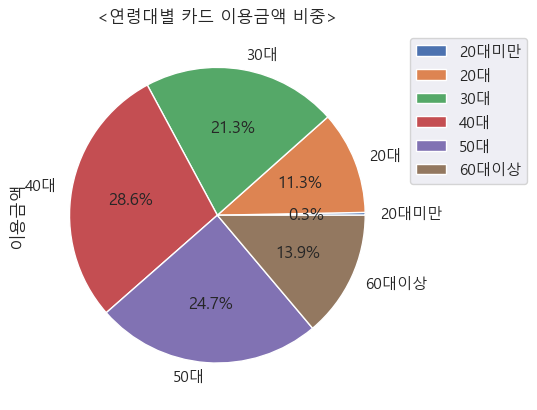

In [38]:
groupby_age.plot(kind='pie', y='이용금액', labels=groupby_age['연령대'], autopct='%.1f%%')
plt.title('<연령대별 카드 이용금액 비중>')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

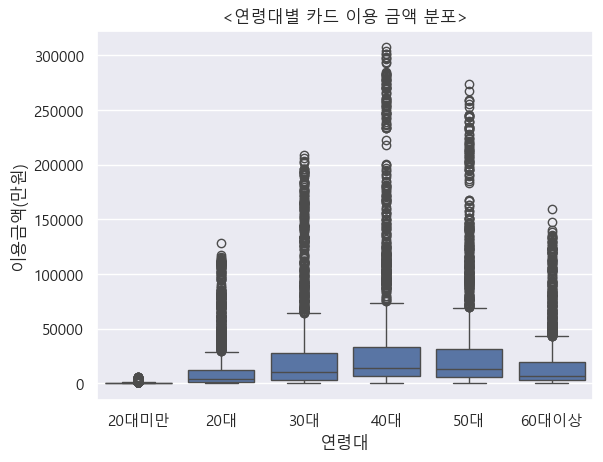

In [39]:
# 연령대별 카드 이용금액 분포
sns.boxplot(data=jeju_df, x='연령대', y='이용금액(만원)', order= ['20대미만', '20대', '30대', '40대', '50대', '60대이상'] )
plt.title('<연령대별 카드 이용 금액 분포>')
plt.show()

In [40]:
# 연령대별 카드 이용금액 분포 (바이올린 플롯)
def violin_plot_of_col_by_age(col):
    age_lst = sorted(jeju_df['연령대'].unique())
    age_lst[0], age_lst[1] = age_lst[1], age_lst[0]
    
    plt.figure(figsize=(10,6))
    
    for i, age in enumerate(age_lst, 1):
        plt.subplot(2, 3, i)
        plt.title(f'{age} 평균 {col}')
        sns.violinplot(data=jeju_df[jeju_df['연령대']==age], y=col)
    plt.tight_layout()
    plt.show()

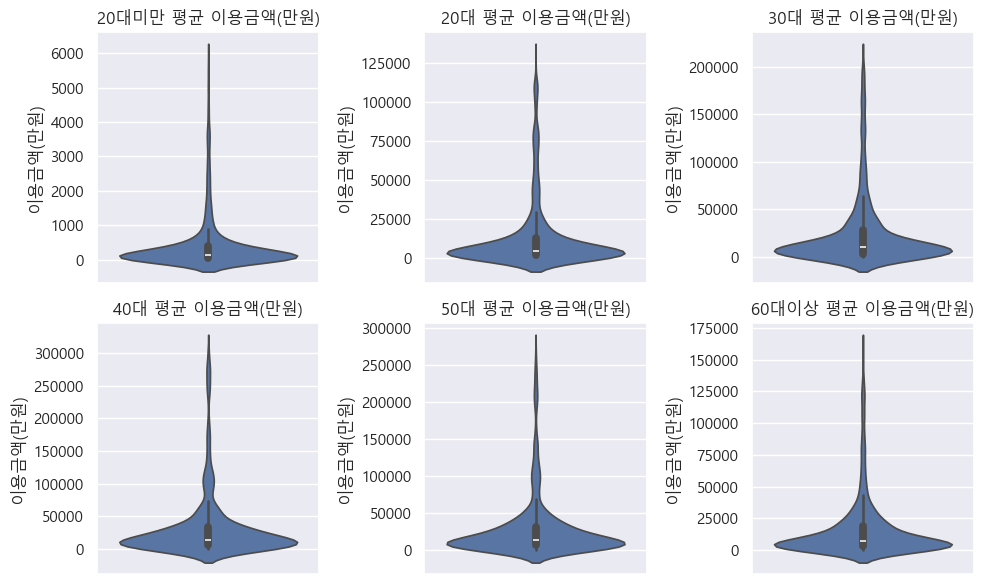

In [41]:
violin_plot_of_col_by_age('이용금액(만원)')

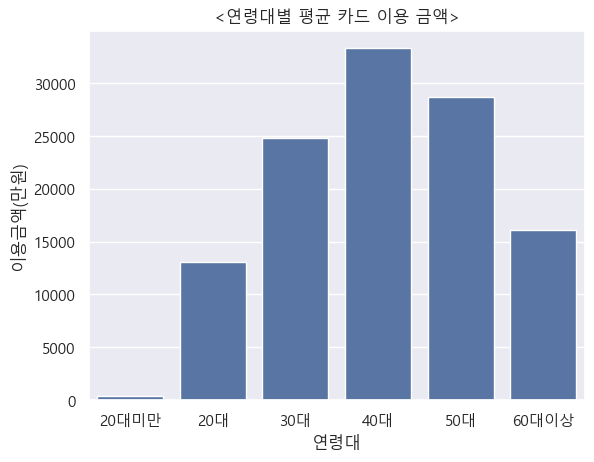

In [42]:
sns.barplot(data=jeju_df, x='연령대', y='이용금액(만원)', errorbar=None, order=['20대미만', '20대', '30대', '40대', '50대', '60대이상'])
plt.title('<연령대별 평균 카드 이용 금액>')
plt.show()

## 연령대별 이용자 수

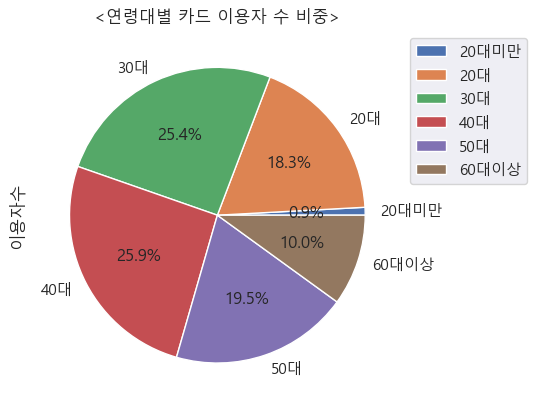

In [43]:
groupby_age.plot(kind='pie', y='이용자수', labels=groupby_age['연령대'], autopct='%.1f%%')
plt.title('<연령대별 카드 이용자 수 비중>')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

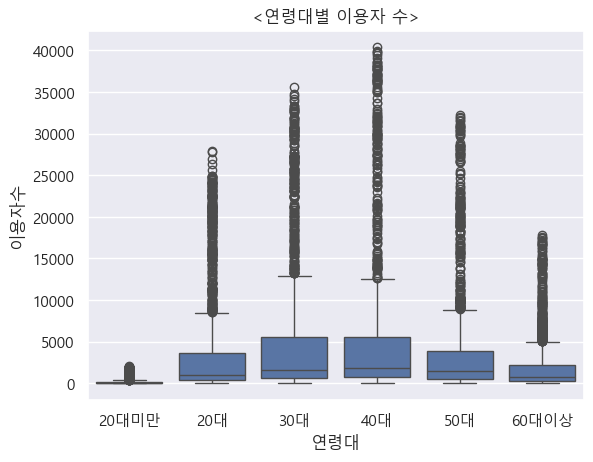

In [44]:
sns.boxplot(data=jeju_df, x='연령대', y='이용자수', order= ['20대미만', '20대', '30대', '40대', '50대', '60대이상'] )
plt.title('<연령대별 이용자 수>')
plt.show()

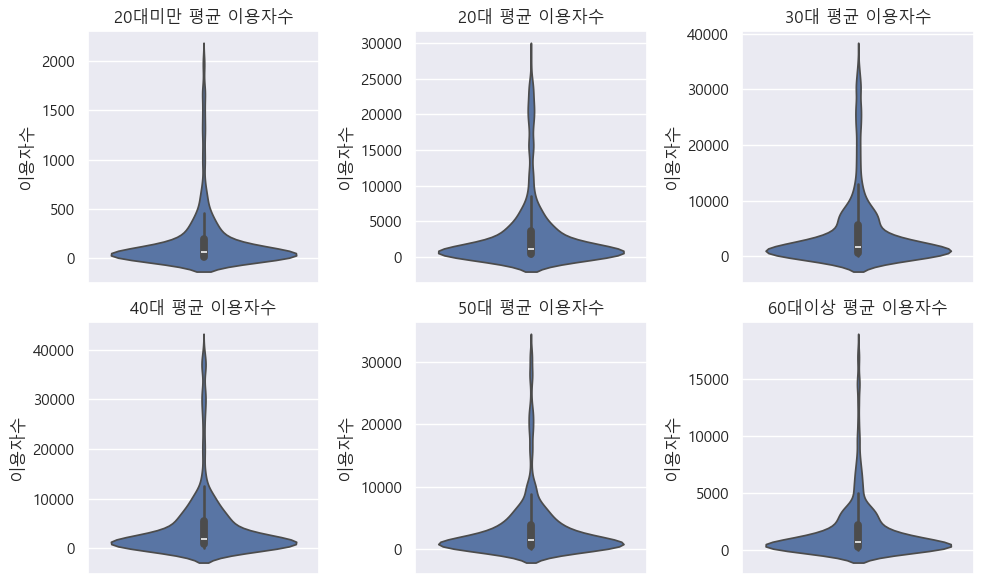

In [45]:
violin_plot_of_col_by_age('이용자수')

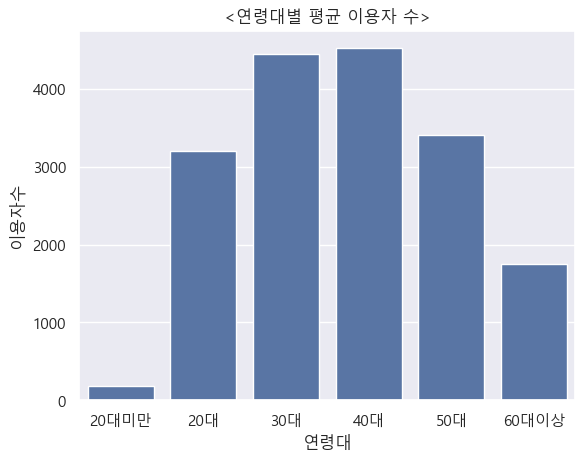

In [46]:
sns.barplot(data=jeju_df, x='연령대', y='이용자수', errorbar=None, order=['20대미만', '20대', '30대', '40대', '50대', '60대이상'])
plt.title('<연령대별 평균 이용자 수>')
plt.show()

## 연령대별 인당 카드 이용금액

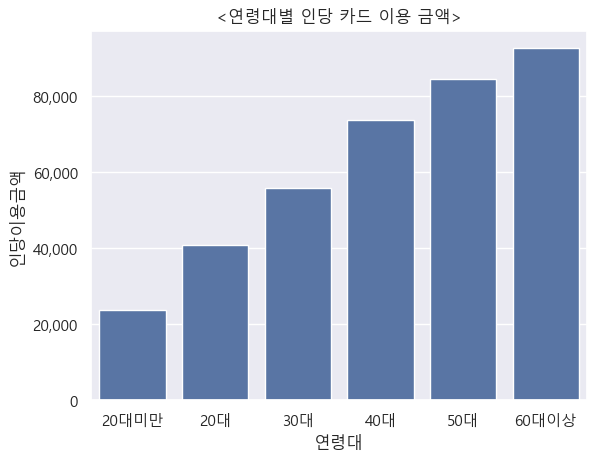

In [47]:
groupby_age['인당이용금액'] = groupby_age['이용금액'] / groupby_age['이용자수']

sns.barplot(data=groupby_age, x='연령대', y='인당이용금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.title('<연령대별 인당 카드 이용 금액>')
plt.show()

## 카드 이용 1회당 소비 금액 알아보기

In [48]:
jeju_df['1회당 소비금액(만원)'] = jeju_df['이용금액(만원)']/ jeju_df['이용횟수']

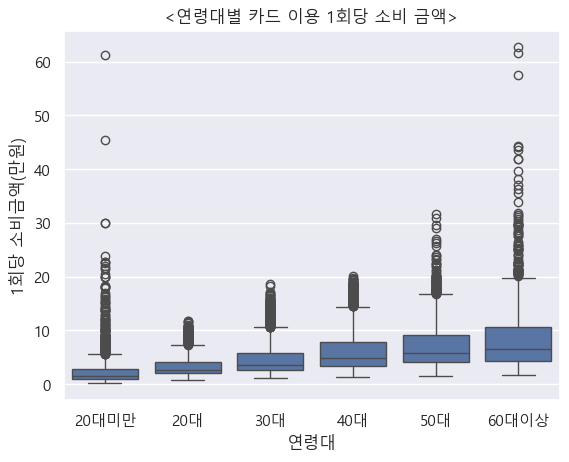

In [49]:
sns.boxplot(data=jeju_df, x='연령대', y='1회당 소비금액(만원)', order= ['20대미만', '20대', '30대', '40대', '50대', '60대이상'] )
plt.title('<연령대별 카드 이용 1회당 소비 금액>')
plt.show()

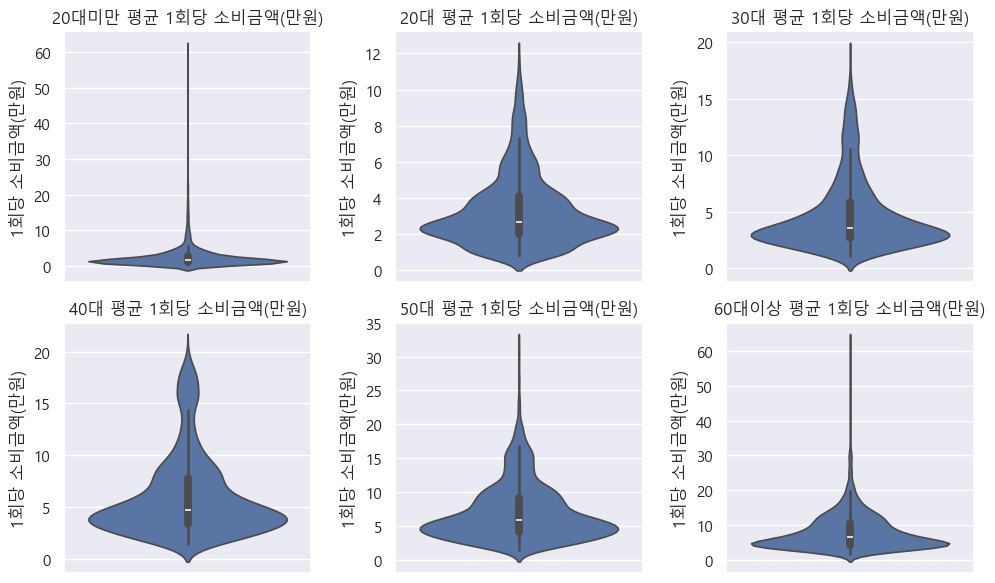

In [50]:
violin_plot_of_col_by_age('1회당 소비금액(만원)')

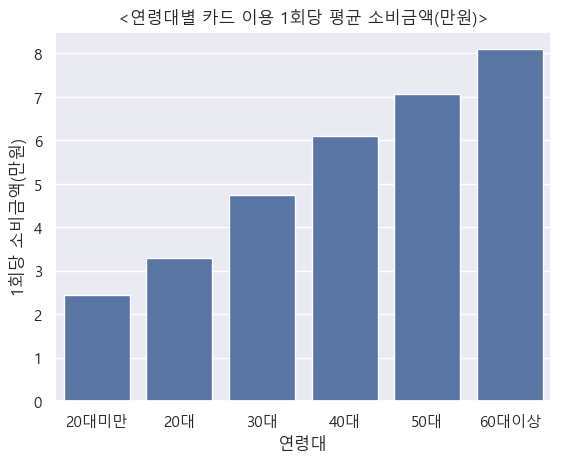

In [51]:
# 1회당 카드 이용 금액
# 60대 이상은 이상점이 너무 많음
sns.barplot(data=jeju_df, x='연령대', y='1회당 소비금액(만원)', errorbar=None, order=['20대미만', '20대', '30대', '40대', '50대', '60대이상'])
plt.title('<연령대별 카드 이용 1회당 평균 소비금액(만원)>')
plt.show()

In [52]:
jeju_df['연령대'].value_counts()

연령대
20대      2688
30대      2688
40대      2688
50대      2688
60대이상    2684
20대미만    2237
Name: count, dtype: int64

## 연령대별 업종별 지출 분포

In [53]:
groupby_age_market = jeju_df.groupby(['연령대', '업종명'])[['이용자수', '이용횟수', '이용금액']].sum().reset_index()
groupby_age_market.head()

C:\Users\user\AppData\Local\Temp\ipykernel_19032\2434427637.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age_market = jeju_df.groupby(['연령대', '업종명'])[['이용자수', '이용횟수', '이용금액']].sum().reset_index()


,연령대,업종명,이용자수,이용횟수,이용금액
0,20대미만,교통,3740,4705,285316774
1,20대미만,문화/레져,40499,80073,805245645
2,20대미만,소매,56257,77825,1638514065
3,20대미만,쇼핑,164635,453747,3008788954
4,20대미만,숙박,3681,4953,114390996


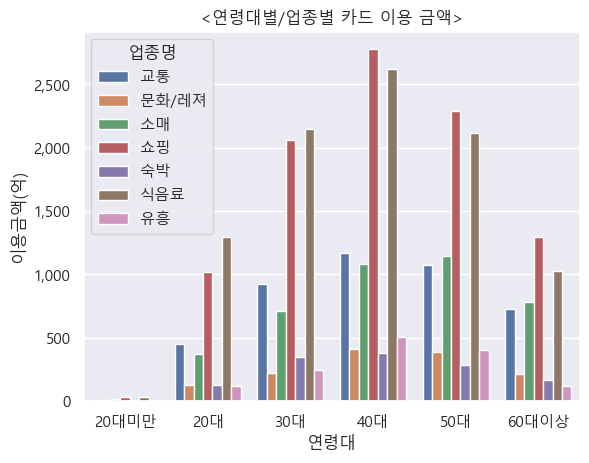

In [54]:
sns.barplot(data=groupby_age_market, x='연령대', y='이용금액', hue='업종명')
plt.title('<연령대별/업종별 카드 이용 금액>')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')
plt.show()

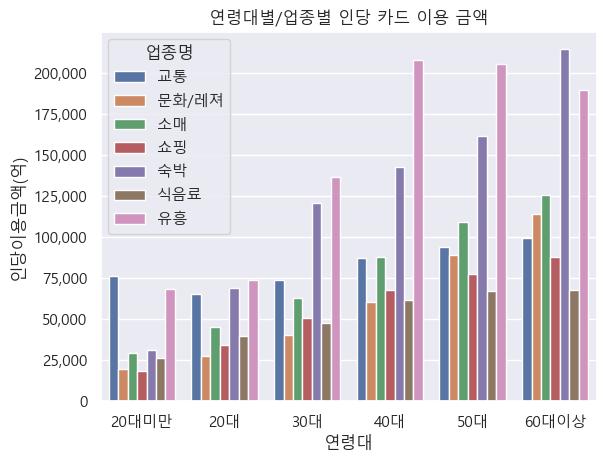

In [55]:
# 인당 이용금액으로 알아보기
groupby_age_market['인당이용금액'] = groupby_age_market['이용금액'] / groupby_age_market['이용자수']

sns.barplot(data=groupby_age_market, x='연령대', y='인당이용금액', hue='업종명')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.title('연령대별/업종별 인당 카드 이용 금액')
plt.ylabel('인당이용금액(억)')
plt.show()

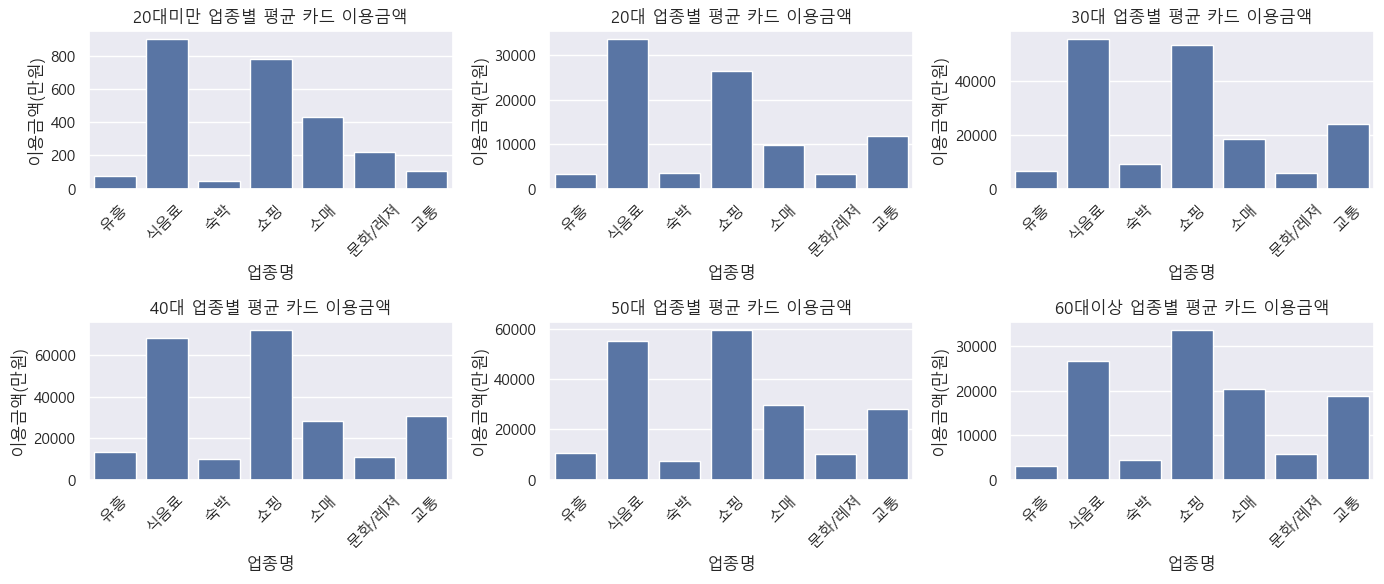

In [56]:
# 연령대별 평균 이용금액 개별적 시각화
ages = list(jeju_df['연령대'].unique())
ages.sort()
ages[0], ages[1] = ages[1], ages[0]

plt.figure(figsize=(14,6))

for i in range(len(ages)):
    df_age = jeju_df.loc[jeju_df['연령대'] == ages[i]]
    plt.subplot(len(ages)//3, 3, i+1)
    plt.title(f'{ages[i]} 업종별 평균 카드 이용금액')
    plt.xticks(rotation=45)
    sns.barplot(data=df_age, x='업종명', y='이용금액(만원)', errorbar=None)

plt.tight_layout()
plt.show()

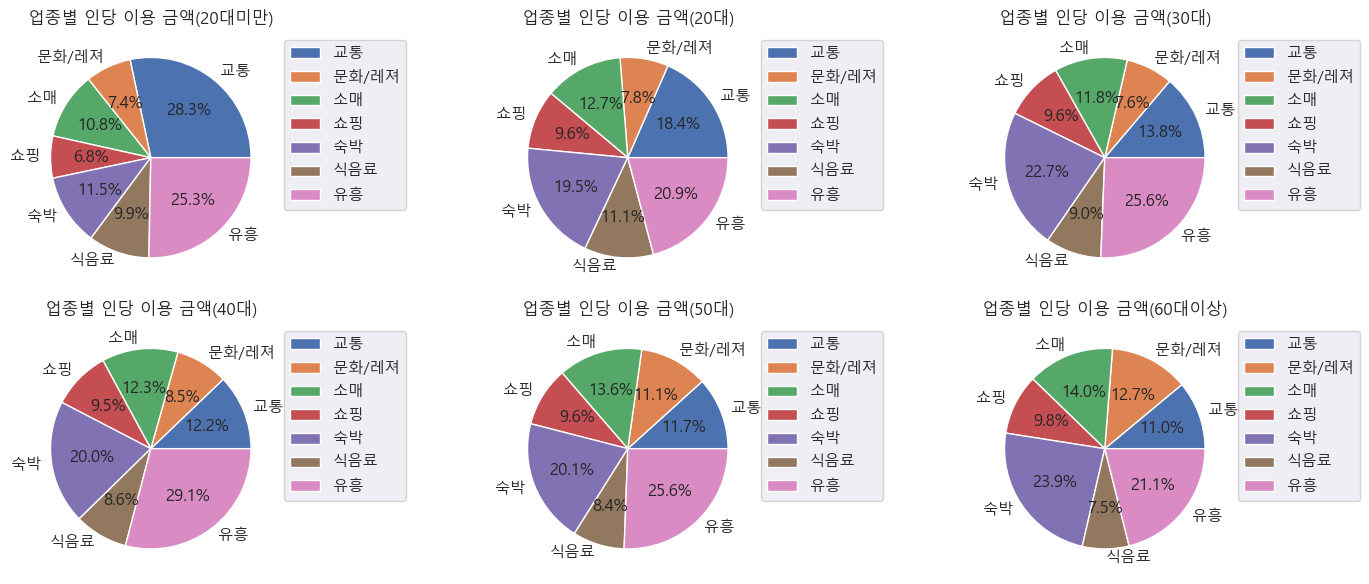

In [57]:
# 연령대별 인당 이용금액 개별적 시각화
plt.figure(figsize=(15, 6))

for i, age in enumerate(groupby_age_market['연령대'].unique(), 1):
    plt.subplot(2, 3, i)
    
    data = groupby_age_market[groupby_age_market['연령대'] == age]

    plt.pie(data['인당이용금액'], labels=data['업종명'], autopct='%.1f%%')
    plt.title(f'업종별 인당 이용 금액({age})')
    plt.xticks(rotation=90)
    plt.legend()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
plt.tight_layout()
plt.show()

## 업종별 성별에 따른 이용금액과 이용자 수

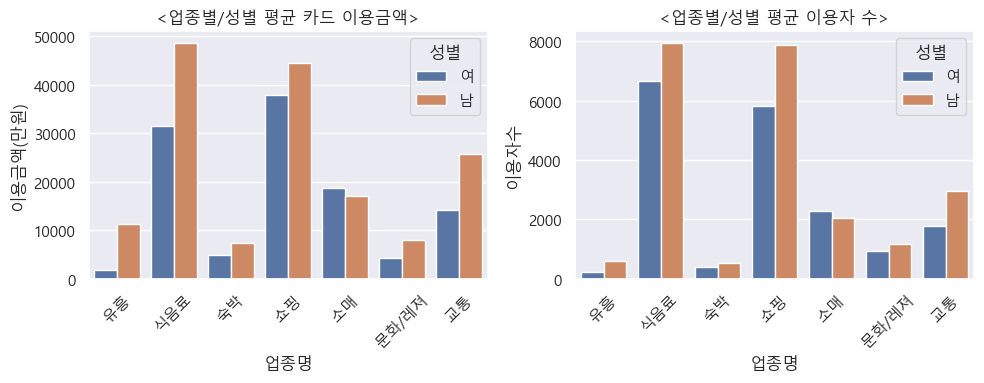

In [58]:
plt.rcdefaults()
sns.set_theme(font='Malgun Gothic')
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.xticks(rotation=45)
plt.title("<업종별/성별 평균 카드 이용금액>")
sns.barplot(data=jeju_df, x='업종명', y='이용금액(만원)', hue='성별', errorbar=None)

plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
plt.title("<업종별/성별 평균 이용자 수>")
sns.barplot(data=jeju_df, x='업종명', y='이용자수', hue='성별', errorbar=None)
plt.tight_layout()

plt.show()

## 업종별 이용자별 카드 이용금액과 이용자 수

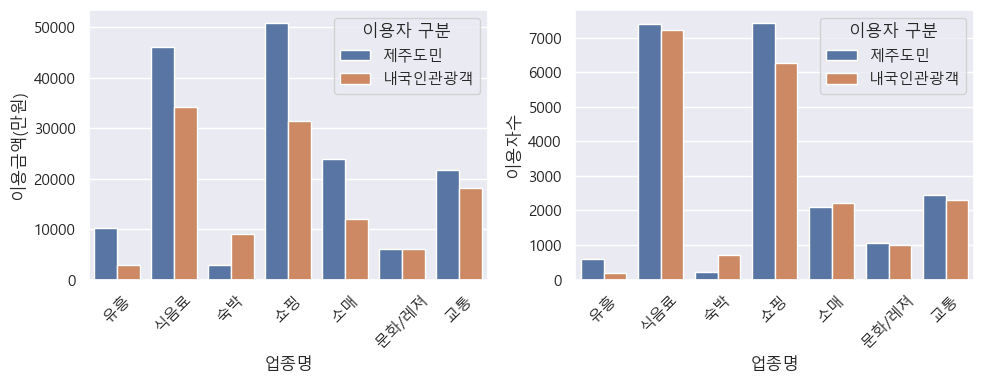

In [59]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.xticks(rotation=45)
sns.barplot(data=jeju_df, x='업종명', y='이용금액(만원)', hue='이용자 구분', errorbar=None)
plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
sns.barplot(data=jeju_df, x='업종명', y='이용자수', hue='이용자 구분', errorbar=None)
plt.tight_layout()
plt.show()

## 지역별 업종 분포

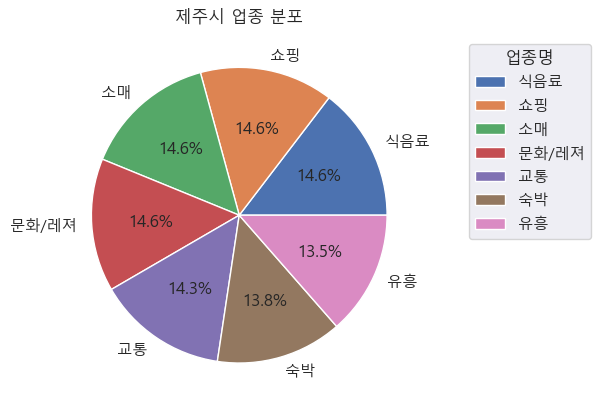

In [60]:
temp = jeju_df.loc[jeju_df['시군구명']=='제주시', '업종명'].value_counts()
labels = temp.index
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(temp, labels=labels, autopct='%1.1f%%')
plt.title('제주시 업종 분포')
ax.legend(wedges, labels, title="업종명", loc="center left", bbox_to_anchor=(1.1, 0.2, 0.5, 1))
plt.show()

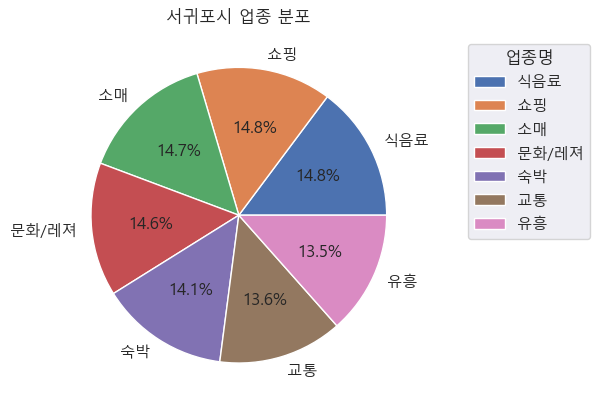

In [61]:
temp = jeju_df.loc[jeju_df['시군구명']=='서귀포시', '업종명'].value_counts()
labels = temp.index
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(temp, labels=labels, autopct='%1.1f%%')
plt.title('서귀포시 업종 분포')
ax.legend(wedges, labels, title="업종명", loc="center left", bbox_to_anchor=(1.1, 0.2, 0.5, 1))
plt.show()

## 지역주민은 어디에 주로 방문하고 소비하는가

In [62]:
jeju_df.groupby(['이용자 구분', '시군구명']).size().to_frame().rename(columns={0:'count'})

count
이용자 구분 시군구명       
내국인관광객 서귀포시   3904
       제주시    3950
제주도민   서귀포시   3887
       제주시    3932

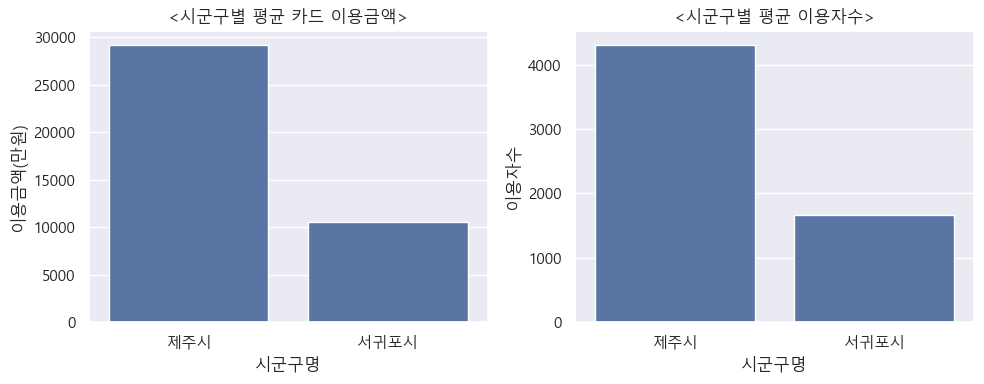

In [63]:
# 시군구별 평균 카드 이용금액과 이용자 수
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('<시군구별 평균 카드 이용금액>')
sns.barplot(data=jeju_df, x='시군구명', y='이용금액(만원)', errorbar=None)

plt.subplot(1, 2, 2)
plt.title('<시군구별 평균 이용자수>')
sns.barplot(data=jeju_df, x='시군구명', y='이용자수', errorbar=None)

plt.tight_layout()
plt.show()

In [64]:
# 시군구별 지역구분 개수
jeju_df.groupby(['시군구명', '지역구분']).size().to_frame().rename(columns={0:'count'})

count
시군구명 지역구분       
서귀포시 도심     3898
     읍면     3893
제주시  도심     3991
     읍면     3891

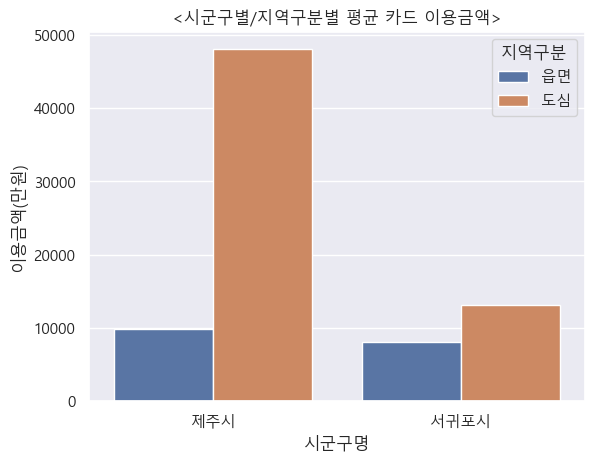

In [65]:
# 시군구 지역구분에 따른 평균 카드 이용금액
sns.barplot(data=jeju_df, x='시군구명', y='이용금액(만원)', hue='지역구분', errorbar=None)
plt.title('<시군구별/지역구분별 평균 카드 이용금액>')
plt.show()

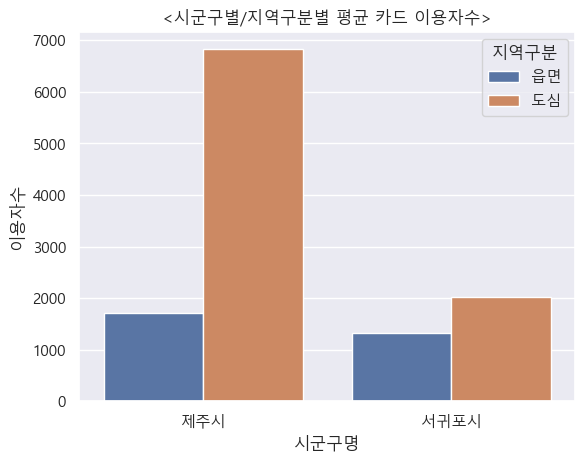

In [23]:
sns.barplot(data=jeju_df, x='시군구명', y='이용자수', hue='지역구분', errorbar=None)
plt.title('<시군구별/지역구분별 평균 카드 이용자수>')
plt.show()

In [66]:
jeju_df['이용자 구분'].value_counts()

이용자 구분
내국인관광객    7854
제주도민      7819
Name: count, dtype: int64

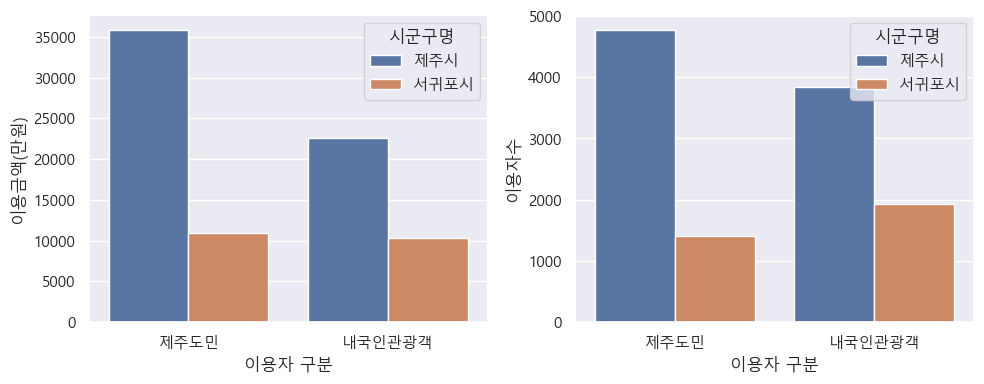

In [67]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(data=jeju_df, x='이용자 구분', y='이용금액(만원)', hue='시군구명', errorbar=None)

plt.subplot(1, 2, 2)
sns.barplot(data=jeju_df, x='이용자 구분', y='이용자수', hue='시군구명', errorbar=None)

plt.tight_layout()
plt.show()

# 이용자별 수는 같지만 제주도민이 훨씬 카드 이용 금액이 더 크다.

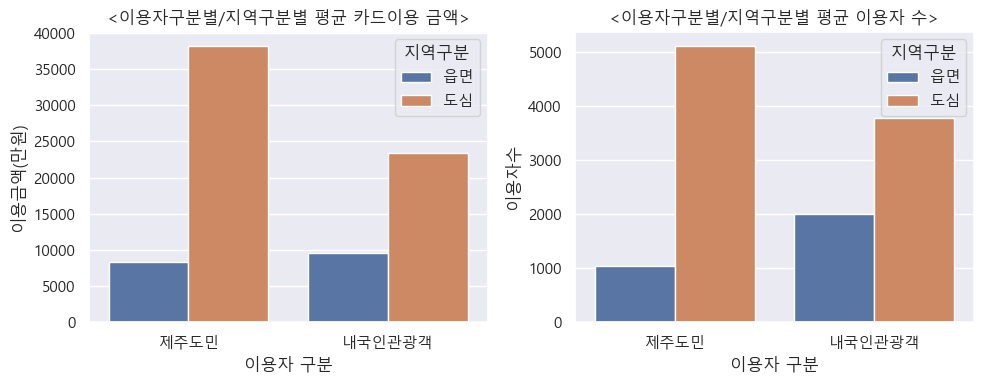

In [64]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(data=jeju_df, x='이용자 구분', y='이용금액(만원)', hue='지역구분', errorbar=None)
plt.title('<이용자구분별/지역구분별 평균 카드이용 금액>')

plt.subplot(1, 2, 2)
sns.barplot(data=jeju_df, x='이용자 구분', y='이용자수', hue='지역구분', errorbar=None)
plt.title('<이용자구분별/지역구분별 평균 이용자 수>')

plt.tight_layout()
plt.show()

# 제주시 그중에서도 도심에 카드 이용 금액이 크게 나타난다.

In [22]:
jeju_df = jeju_df[jeju_df['업종명'] != '기타']
jeju_df.groupby(['시군구명', '지역구분', '업종명']).size()

시군구명  지역구분  업종명  
서귀포시  도심    교통       528
            문화/레져    571
            소매       576
            쇼핑       576
            숙박       540
            식음료      576
            유흥       531
      읍면    교통       532
            문화/레져    567
            소매       570
            쇼핑       576
            숙박       555
            식음료      576
            유흥       517
제주시   도심    교통       574
            문화/레져    576
            소매       576
            쇼핑       576
            숙박       555
            식음료      576
            유흥       558
      읍면    교통       550
            문화/레져    571
            소매       574
            쇼핑       576
            숙박       534
            식음료      576
            유흥       510
dtype: int64

## 연령대별 제주도민 수, 내국인 관광객 수

In [68]:
jeju_df.groupby(['연령대', '이용자 구분']).size().to_frame().rename(columns={0:'count'})

C:\Users\user\AppData\Local\Temp\ipykernel_19032\1787999430.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jeju_df.groupby(['연령대', '이용자 구분']).size().to_frame().rename(columns={0:'count'})


count
연령대   이용자 구분       
20대미만 내국인관광객   1135
      제주도민     1102
20대   내국인관광객   1344
      제주도민     1344
30대   내국인관광객   1344
      제주도민     1344
40대   내국인관광객   1344
      제주도민     1344
50대   내국인관광객   1344
      제주도민     1344
60대이상 내국인관광객   1343
      제주도민     1341

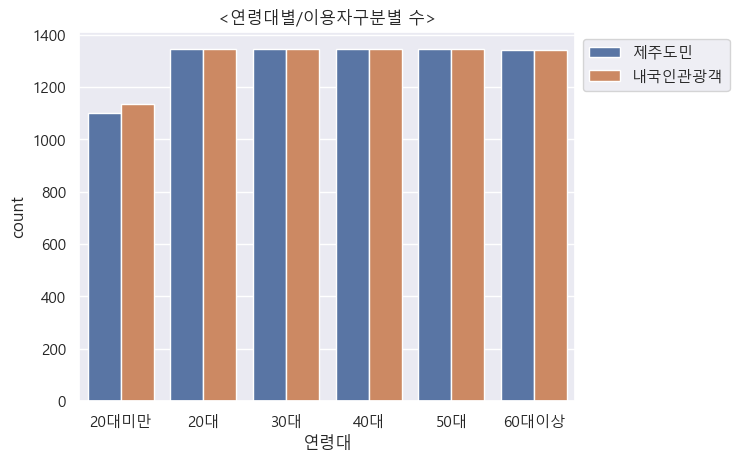

In [69]:
sns.countplot(data=jeju_df, x='연령대', hue='이용자 구분', order=['20대미만', '20대', '30대', '40대', '50대', '60대이상'])
plt.title('<연령대별/이용자구분별 수>')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()